In [2]:
# For autoreloading modules
%load_ext autoreload
%autoreload 2
# For notebook plotting
%matplotlib inline



In [3]:
#!pip install git+https://github.com/fastai/fastai@2e1ccb58121dc648751e2109fc0fbf6925aa8887
#!apt update && apt install -y libsm6 libxext6

In [4]:
#sudo apt-get install libsm6 libxrender1 libfontconfig1
#!pip install opencv-python
#!apt update && apt install -y libsm6 libxext6

In [5]:
# Standard libraries
import os
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pdpbox import pdp
from plotnine import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display

# Machine Learning
import sklearn
from sklearn import metrics
from scipy.cluster import hierarchy as hc
from fastai.imports import *
from fastai.structured import *

In [6]:
train = pd.read_csv('data/train.csv')

In [7]:
train[train['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [9]:
train.drop(2744604, inplace=True)

In [10]:
# Kills without moving
train['totalDistance'] = train['rideDistance'] + train['walkDistance'] + train['swimDistance']
train['killsWithoutMoving'] = ((train['kills'] > 0) & (train['totalDistance'] == 0))

In [11]:
# compute headshot rate
train['headshot_rate'] = train['headshotKills'] / train['kills']
train['headshot_rate'] = train['headshot_rate'].fillna(0)

In [12]:
import seaborn as sns

In [13]:
def show_distplot(column):
    plt.figure(figsize=(12, 4))
    sns.distplot(train[column], bins=50)
    plt.show()

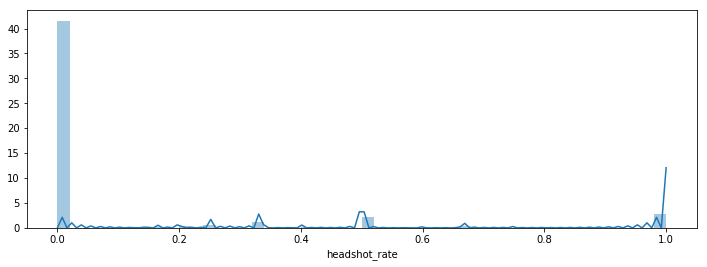

In [14]:
show_distplot('headshot_rate')

according to the graph of kills, over 99% of players kill less than 8 people. So if kills > 8 and headshot rate is 100%, it is most likely to be a cheater.

In [15]:
train[(train['headshot_rate'] >= 1) & (train['kills'] > 8)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate
281570,ab9d7168570927,add05ebde0214c,e016a873339c7b,2,3,1212.0,8,10,0,1,...,0.00,0,0,2939.0,5,0,0.8462,2939.00,False,1.0
346124,044d18fc42fc75,fc1dbc2df6a887,628107d4c41084,3,5,1620.0,13,11,3,1,...,0.00,0,0,3422.0,8,1560,1.0000,8142.00,False,1.0
692391,2045006b2f610f,fcf331714fa7d6,b547ed02a1b4ab,0,4,1007.0,6,9,5,1,...,0.00,0,0,1652.0,5,0,1.0000,4272.00,False,1.0
708136,f3b1da5d947713,a2bc33d5315aad,dd4a2f8d8ab732,0,4,914.2,0,9,2,1,...,91.36,0,0,4812.0,7,0,1.0000,5208.36,False,1.0
818699,76d4fbdaa3fadd,10d8ea9d44aca6,6143ed5e96f906,1,9,948.8,0,9,1,2,...,0.00,0,0,2833.0,8,1500,1.0000,4242.00,False,1.0
871244,e668a25f5488e3,5ba8feabfb2a23,f6e6581e03ba4f,0,4,1365.0,9,13,0,1,...,0.00,0,0,2105.0,5,1587,1.0000,2105.00,False,1.0
908815,566d8218b705aa,a9b056478d71b2,3a41552d553583,2,5,1535.0,10,10,3,1,...,0.00,2,0,2761.0,7,1519,0.9630,7948.00,False,1.0
963463,1bd6fd288df4f0,90584ffa22fe15,ba2de992ec7bb8,2,6,1355.0,12,10,2,1,...,0.00,0,0,2458.0,4,1562,1.0000,3476.00,False,1.0
1079403,1c245ed99b5f96,e42d09a9b8463a,5cec236bce68eb,0,5,1218.0,8,11,3,1,...,0.00,0,0,2932.0,4,0,1.0000,8178.00,False,1.0
1167959,c4f80d4be5c561,b4a7892189b5dd,c7f7733ebbd447,0,4,1065.0,6,10,1,1,...,0.00,0,0,2450.0,7,1468,1.0000,2858.90,False,1.0


In [16]:
# Remove those who headshot over 8 people 
train.drop(train[(train['headshot_rate'] >= 1) & (train['kills'] > 8)].index, inplace=True)

In [17]:
display(train[train['killsWithoutMoving'] == True].shape)
train[train['killsWithoutMoving'] == True].head(10)

(1535, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.00,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,0.0,True,0.000000
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.60,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,0.0,True,0.000000
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.00,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,0.0,True,0.200000
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.80,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,0.0,True,0.000000
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.00,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,0.0,True,1.000000
20881,40871bf43ddac7,2cea046b7d1dce,0600f86f11c6e4,0,0,506.10,4,1,3,7,...,0.0,0,0,0.0,8,0,0.8000,0.0,True,0.166667
23298,b950836d0427da,1f735b1e00d549,ad860f4e162bbc,1,0,1124.00,0,4,1,7,...,0.0,0,0,0.0,8,0,0.6000,0.0,True,0.333333
24640,aeced11d46de19,d4009ffa95bb4f,73f3ed869c9171,2,0,529.90,0,2,11,12,...,0.0,0,0,0.0,8,0,0.8571,0.0,True,0.285714
25659,6626c4d47cffa0,ee3fe5c0d917c3,341341834b7941,0,1,128.90,0,1,6,53,...,0.0,0,0,0.0,12,1500,0.2857,0.0,True,0.500000
30079,869331b90bfa3f,869ea3ad036e53,fa373e28ff5062,0,0,85.56,0,0,0,46,...,0.0,0,0,0.0,4,0,0.8571,0.0,True,0.000000


In [18]:
# Remove those who kill without moving
train.drop(train[train['killsWithoutMoving'] == True].index, inplace=True)

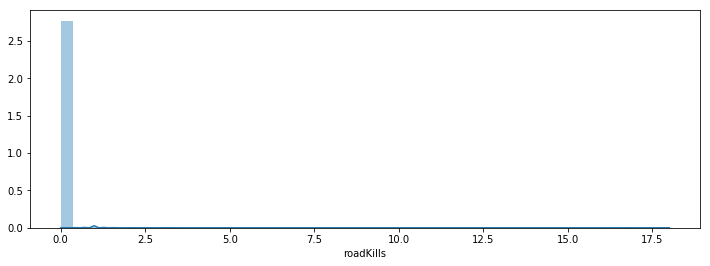

In [19]:
show_distplot('roadKills')

In [20]:
train['roadKillwithoutRiding'] = ((train['roadKills'] > 0) & (train['rideDistance'] == 0))


In [21]:
train[train['roadKillwithoutRiding'] & (train['roadKills'] > 1)]
# This is reasonable so we won't consider cheaters in those who make roadkills without riding.

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate,roadKillwithoutRiding
211917,e419d78ab6ec51,f29e69f57c1390,353d7a4c2d0a42,0,6,442.2,5,0,4,3,...,0,0,5316.0,4,1524,1.0000,5316.0,False,0.000000,True
729334,a52b2c3ac0d741,cce9f008c5fc16,5eaf91a0c7235f,1,3,726.4,8,2,0,1,...,0,0,3208.0,3,1487,1.0000,3208.0,False,0.250000,True
1350264,0f2aebea95f0b3,b01a187d767dcc,a45dfc1bf6363b,0,1,405.9,3,1,1,10,...,0,0,2412.0,3,0,0.5185,2412.0,False,0.333333,True
1488154,6787043b99c3d2,92cca93daf0e29,504f0e3b75a3c2,0,1,501.2,4,0,3,5,...,0,0,2237.0,5,1568,0.4074,2237.0,False,0.000000,True
1705138,c71fe495c0b327,d5aa9bd1a0a399,ac867443bdc6b7,0,0,188.9,2,0,0,18,...,0,0,400.5,2,0,0.3750,400.5,False,0.000000,True
1909179,2a790e0ecc5dc8,0f4232639b6910,d6746e6e65d2a8,0,2,327.4,4,1,1,12,...,0,0,1467.0,4,1417,0.4444,1467.0,False,0.333333,True


In [22]:
train['roadkillPerdistance'] = train['roadKills'] / train['rideDistance']
train['roadkillPerdistance'] = train['roadkillPerdistance'].fillna(0)

In [23]:
train['roadkillPerdistance'] = train['roadkillPerdistance'].replace(np.inf, 0)

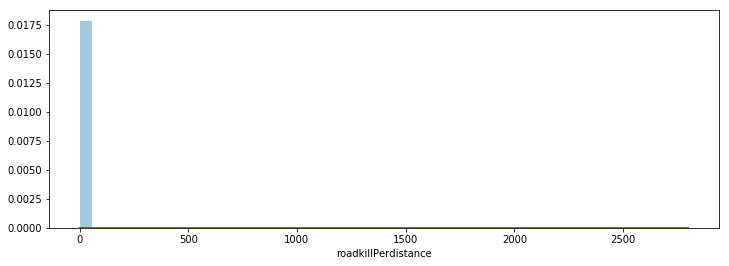

In [24]:
show_distplot('roadkillPerdistance')


In [25]:


train[(train['roadkillPerdistance'] > 100) & (train['roadKills']>2.5)].roadKills

60508       4
201586      3
471329      8
1575207     3
2466988     4
2733926    14
3633685     3
Name: roadKills, dtype: int64

In [26]:
# Remove those who ride little but kill too many people when riding
train.drop(train[(train['roadkillPerdistance'] > 100) & (train['roadKills']>2.5)].index, inplace=True)

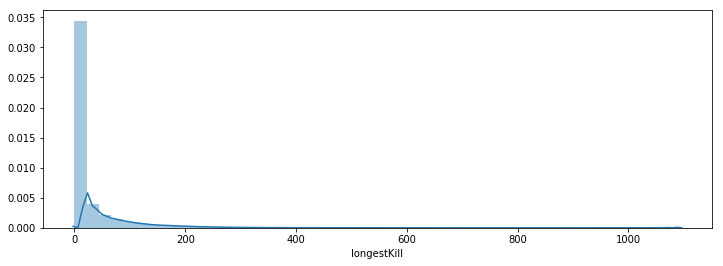

In [27]:
show_distplot('longestKill')


In [28]:
train[train['longestKill']>1500]
# We arent going to remove data based on longest kills because an upper limit of 1500m seems reasonable. 
# It is because when you knock someone down, it will be some time before he finally dies during which you may drive or run.

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate,roadKillwithoutRiding,roadkillPerdistance


In [42]:
# those who kill more than 3 teammates (himself can be included) while in a duo game (where only 2 players in a team)
train[(train['teamKills'] >= 3) & (train['matchType'] == 'normal-duo-fpp')]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate,roadKillwithoutRiding,roadkillPerdistance
948394,4749879721f43d,50af00a6f08378,a97f4f50bd636b,0,0,1410.0,0,0,0,3,...,0,147.4,28,1500,0.0,147.4,False,0.0,False,0.0


In [43]:
# those who kill more than 3 teammates(himself can be included) while in a duo game (where only 2 players in a team)
train[(train['teamKills'] >= 3) & (train['matchType'] == 'normal-duo')]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate,roadKillwithoutRiding,roadkillPerdistance


In [45]:
# those who kill more than 2 teammates(himself can be included) while in a solo game (where only 1 player in a team)
train[(train['teamKills'] >= 2) & (train['matchType'] == 'normal-solo-fpp')].teamKills

358089     2
2754472    2
Name: teamKills, dtype: int64

In [46]:
# those who kill more than 2 teammates(himself can be included) while in a solo game (where only 1 player in a team)
train[(train['teamKills'] >= 2) & (train['matchType'] == 'normal-solo')].teamKills

650578     2
1194695    4
1349703    3
4282536    2
4304114    5
Name: teamKills, dtype: int64

In [47]:
# those who kill more than 5 teammates(himself can be included) while in a solo game (where only 4 players in a team)

train[(train['teamKills'] >= 5) & (train['matchType'] == 'normal-squad-fpp')].teamKills

187241      5
407630     10
1377044    12
1920247     5
2604229     5
2961722     5
3187704     5
3470880     6
4118763     8
Name: teamKills, dtype: int64

In [54]:
# those who kill more than 5 teammates(himself can be included) while in a solo game (where only 4 players in a team)
train[(train['teamKills'] >= 5) & (train['matchType'] == 'normal-squad')].teamKills

Series([], Name: teamKills, dtype: int64)

In [55]:
# drop those cheaters
#train.drop(train[(train['headshot_rate'] >= 1) & (train['kills'] > 8)].index, inplace=True)
train.drop(train[(train['teamKills'] >= 3) & (train['matchType'] == 'normal-duo')].index, inplace=True)
train.drop(train[(train['teamKills'] >= 3) & (train['matchType'] == 'normal-duo-fpp')].index, inplace=True)
train.drop(train[(train['teamKills'] >= 2) & (train['matchType'] == 'normal-solo-fpp')].index, inplace=True)
train.drop(train[(train['teamKills'] >= 2) & (train['matchType'] == 'normal-solo')].index, inplace=True)
train.drop(train[(train['teamKills'] >= 5) & (train['matchType'] == 'normal-squad-fpp')].index, inplace=True)
train.drop(train[(train['teamKills'] >= 5) & (train['matchType'] == 'normal-squad')].index, inplace=True)

In [62]:
def modifyMatchType(data):
    data['matchType'][data['matchType'] == 'normal-solo'] = 'solo'
    data['matchType'][data['matchType'] == 'solo-fpp'] = 'solo'
    data['matchType'][data['matchType'] == 'normal-solo-fpp'] = 'solo'
    data['matchType'][data['matchType'] == 'normal-duo-fpp'] = 'duo'
    data['matchType'][data['matchType'] == 'normal-duo'] = 'duo'
    data['matchType'][data['matchType'] == 'duo-fpp'] = 'duo'
    data['matchType'][data['matchType'] == 'squad-fpp'] = 'squad'
    data['matchType'][data['matchType'] == 'normal-squad'] = 'squad'
    data['matchType'][data['matchType'] == 'normal-squad-fpp'] = 'squad'
    data['matchType'][data['matchType'] == 'flaretpp'] = 'Other'
    data['matchType'][data['matchType'] == 'flarefpp'] = 'Other'
    data['matchType'][data['matchType'] == 'crashtpp'] = 'Other'
    data['matchType'][data['matchType'] == 'crashfpp'] = 'Other'

    return data


data = train.copy()
data = modifyMatchType(data)
print (set(data['matchType']))

{'Other', 'solo', 'squad', 'duo'}


In [70]:
data[data['kills']>40]
# in cases with large kills, there are two kinds of ouliners:
# One is cheaters
# The other is those whose actual level is a lot higher than his matching enemies, 
# but use a low-level player account to win 
# Both two kinds will affect our final result.

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate,roadKillwithoutRiding,roadkillPerdistance
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,...,0,23.710,61,0,0.7000,23.710,False,0.250000,False,0.0
160254,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0,4033.0,0,40,0,1,...,0,718.300,16,1500,1.0000,718.300,False,0.952381,False,0.0
334400,810f2379261545,7f3e493ee71534,f900de1ec39fa5,20,0,6616.0,0,13,5,1,...,0,1036.000,60,0,1.0000,1036.000,False,0.200000,False,0.0
672993,da31f191ace8ed,ce9a3c4950a8f2,17dea22cefe62a,10,0,5793.0,0,5,2,1,...,0,24.270,56,0,1.0000,24.270,False,0.087719,False,0.0
770454,2ade4369bccd12,9f9e64a3db8384,e024bf51bf1799,12,0,5557.0,0,7,4,1,...,0,85.550,66,0,1.0000,85.550,False,0.127273,False,0.0
781794,36c5d7b936e078,fa23463effba78,b06aa721ab324a,13,0,4750.0,0,8,6,1,...,0,370.900,54,1500,1.0000,370.900,False,0.190476,False,0.0
797111,7f3edd982813e6,10a20932a5cf8f,cfa2775c9ef944,6,0,5406.0,0,16,14,1,...,0,287.500,50,1500,1.0000,287.500,False,0.285714,False,0.0
917841,f24af40d9db7f5,db5cc31ce34729,17c643ab998ecb,7,0,3781.0,0,10,3,1,...,0,889.300,77,1500,1.0000,905.200,False,0.227273,False,0.0
1248348,80ac0bbf58bfaf,1e54ab4540a337,08e4c9e6c033e2,5,0,6375.0,0,21,4,1,...,0,1740.000,23,0,1.0000,1740.000,False,0.318182,False,0.0
1378200,f241fdbb4f94c6,fadbbc4cbb3e06,e024bf51bf1799,9,0,3707.0,0,5,1,5,...,0,46.710,72,0,0.7778,46.710,False,0.121951,False,0.0


In [71]:
# drop those outliners
data.drop(data[data['kills']>40].index, inplace=True)

In [73]:
def show_distplot(column):
    plt.figure(figsize=(12, 4))
    sns.distplot(data[column], bins=50)
    plt.show()

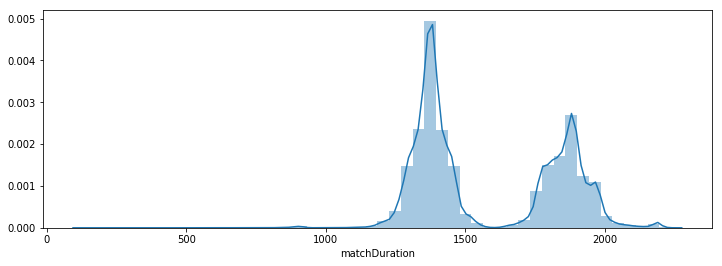

In [74]:
show_distplot('matchDuration')

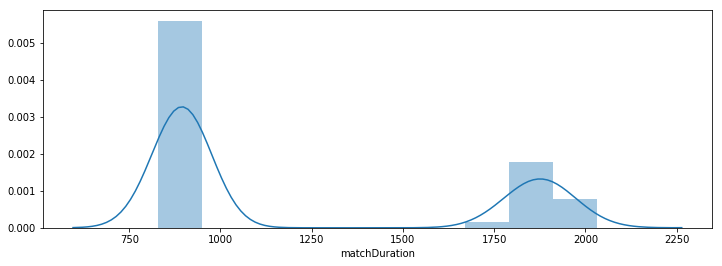

In [77]:
plt.figure(figsize=(12,4))
sns.distplot(data['matchDuration'][data['matchType']=='Other'], bins=10)
plt.show()

In [82]:
data[(data['matchDuration']<180) & (data['matchType']=='Other')]
# All event matches are longer than 3 min. That will be good. So no removal is needed.

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate,roadKillwithoutRiding,roadkillPerdistance


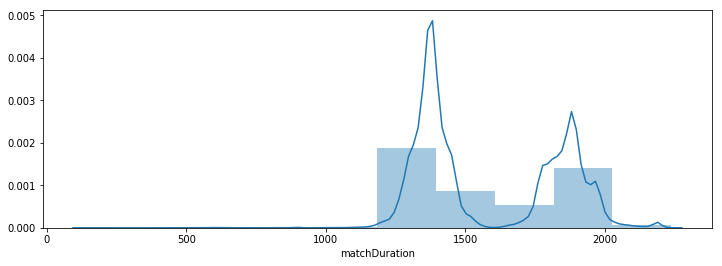

In [83]:
plt.figure(figsize=(12,4))
sns.distplot(data['matchDuration'][data['matchType']!='Other'], bins=10)
plt.show()

In [84]:
data[(data['matchDuration']<300) & (data['matchType']!='Other')]
# non-event matches that last no more than 5 min

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate,roadKillwithoutRiding,roadkillPerdistance
34524,07926abd076c98,537c1acfd487ac,1b525c6d1f1b07,1,0,137.30,2,0,0,7,...,0,57.1800,0,1500,0.4444,57.1800,False,0.0,False,0.0
50129,1420a7e4a2cb75,ada73fcbe4245a,1b525c6d1f1b07,2,0,63.72,0,0,0,14,...,0,40.4600,0,1500,0.6667,40.4600,False,0.0,False,0.0
187246,3786210313ae51,f47691f11af437,0ac026a48eb471,0,0,0.00,0,0,0,5,...,0,0.0000,1,1500,0.5000,0.0000,False,0.0,False,0.0
219121,8ee8b4ab9bb4f1,6d8c3334b661b7,0ac026a48eb471,0,0,139.40,1,1,0,2,...,0,49.7000,1,1500,1.0000,49.7000,False,0.5,False,0.0
222139,75eac2678d190f,5328857c90f929,1b525c6d1f1b07,1,0,62.40,0,0,0,13,...,0,61.3700,0,1500,0.7778,61.3700,False,0.0,False,0.0
248445,887443503ee644,32563ae6b0a67b,4bad505429bdcc,0,0,100.00,0,0,0,5,...,0,35.5300,1,1500,0.2727,35.5300,False,0.0,False,0.0
287405,1080cb3f8eea93,0582a5f7ce0a47,314d802f118c17,0,2,330.70,0,2,1,1,...,0,229.3000,2,1500,1.0000,229.3000,False,0.5,False,0.0
499702,bff6020506ae0c,90d060a886dfe4,d75f0678df8c8e,1,0,87.49,1,0,0,2,...,0,346.3000,3,1500,1.0000,346.3000,False,0.0,False,0.0
562695,2b7e0979d60d75,77b06d5317638c,1b525c6d1f1b07,2,0,95.68,0,0,0,6,...,0,54.0700,0,1500,0.8889,54.0700,False,0.0,False,0.0
668412,55559aca23fac6,4c2cee93fc8f42,1b525c6d1f1b07,0,0,100.00,1,0,0,8,...,0,21.6400,0,1500,0.2222,21.6400,False,0.0,False,0.0


In [85]:
# drop matches that are too short
data.drop(data[(data['matchDuration']<300) & (data['matchType']!='Other')].index, inplace=True)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4445269 entries, 0 to 4446965
Data columns (total 34 columns):
Id                       object
groupId                  object
matchId                  object
assists                  int64
boosts                   int64
damageDealt              float64
DBNOs                    int64
headshotKills            int64
heals                    int64
killPlace                int64
killPoints               int64
kills                    int64
killStreaks              int64
longestKill              float64
matchDuration            int64
matchType                object
maxPlace                 int64
numGroups                int64
rankPoints               int64
revives                  int64
rideDistance             float64
roadKills                int64
swimDistance             float64
teamKills                int64
vehicleDestroys          int64
walkDistance             float64
weaponsAcquired          int64
winPoints                int64
winPl

In [89]:
data.drop(columns = ['killsWithoutMoving'], inplace=True)


KeyError: "['killsWithoutMoving'] not found in axis"

In [90]:
data.drop(columns = ['roadKillwithoutRiding'], inplace=True)

In [91]:
data.drop(columns = ['roadkillPerdistance'], inplace=True)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4445269 entries, 0 to 4446965
Data columns (total 31 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
totalDistance      float64
headshot_rate      float64
dtypes: float64(8), int64(19), object(4)
memory usage: 1.1+ GB


In [93]:
data['boostsAndheals'] = data['boosts']+data['heals']

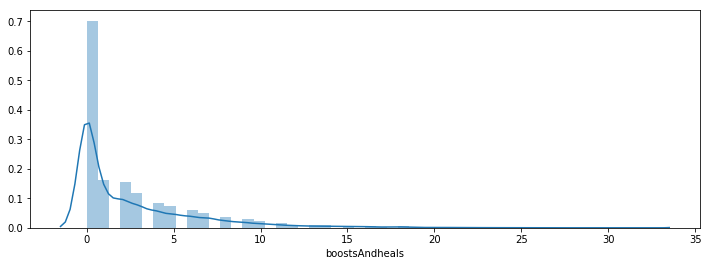

In [95]:
plt.figure(figsize=(12,4))
sns.distplot(data['boostsAndheals'][data['matchType']=='Other'], bins=50)
plt.show()

In [98]:
data['matchDuration'][(data['matchType']=='Other') & (data['boostsAndheals'] > 30)]
# seems normal

2887138    850
Name: matchDuration, dtype: int64

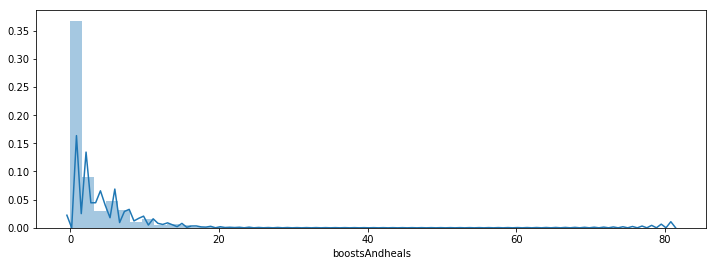

In [96]:
plt.figure(figsize=(12,4))
sns.distplot(data['boostsAndheals'][data['matchType']!='Other'], bins=50)
plt.show()

In [103]:
data[(data['matchType']!='Other') & (data['boostsAndheals'] > 60)]
# emm... too many

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshot_rate,boostsAndheals
700615,512ca0f7c6729b,de2c3988154e5e,03a24daa0f3e65,0,3,0.000,3,0,61,48,...,0.00,1,0,963.8,2,0,0.6364,1626.60,0.0,64
807030,1b1d77a24be1e1,4b83c72836d02e,109b5a0176fc3e,0,5,0.000,0,0,57,46,...,24.97,0,0,3003.0,5,0,0.8617,5610.97,0.0,62
996709,6737eed1cf8dfc,12cc81f7d2eb4d,5f9a59a3ef190d,0,6,1.824,0,0,63,37,...,0.00,0,0,1752.0,4,1516,0.8481,5658.00,0.0,69
2067819,2dbfd2d0a51710,c242313874f3da,3c8d50f42ead8d,1,7,358.100,1,0,59,27,...,0.00,0,0,3131.0,7,1602,0.8750,5149.00,0.0,66
2636846,74554be92b2f9a,54ad9e377c0f34,628f99c2113688,0,14,0.000,0,0,51,45,...,0.00,0,0,632.5,3,0,0.7037,816.80,0.0,65
3419345,4d6c412604232f,ff7daf14a68de4,fea1354b6e5089,1,8,146.700,0,0,61,30,...,0.00,0,0,1762.0,6,1620,0.8409,9082.00,0.0,69
3476343,1ac3c7d24475c8,ea7008368b4c5d,fcc78beee326e3,1,4,207.200,0,0,73,26,...,0.00,0,0,3078.0,4,0,0.8889,7755.00,0.0,77
3502324,82c19658af10d5,ce48fc5699d820,e519de881f8129,0,5,193.800,1,1,59,17,...,0.00,0,0,2385.0,6,0,0.7857,2385.00,0.5,64
3522954,3a2ee4b92ec5b5,acecc529eddc06,12f66105afeb30,0,6,100.000,0,0,55,21,...,0.00,0,0,1364.0,5,0,0.9053,6790.00,0.0,61
4262662,3be1ded892f443,5c6c4e66418c25,ce09de37cf3f5a,0,1,230.000,5,0,80,41,...,0.00,0,0,932.7,4,1527,0.7600,4299.70,0.0,81


In [104]:
data.drop(data[(data['matchType']!='Other') & (data['boostsAndheals'] > 60)].index, inplace=True)
# drop those with too many boosts and heals

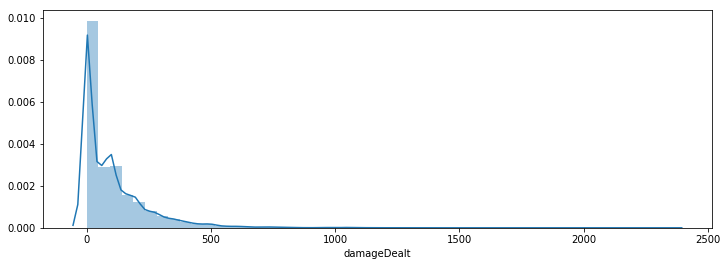

In [105]:
plt.figure(figsize=(12,4))
sns.distplot(data['damageDealt'][data['matchType']=='Other'], bins=50)
plt.show()

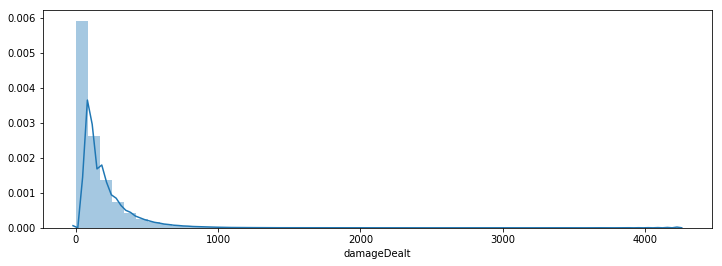

In [106]:
plt.figure(figsize=(12,4))
sns.distplot(data['damageDealt'][data['matchType']!='Other'], bins=50)
plt.show()

According to our experience from ourselves and friends, it seems normal even for damage over 4000. 
We are not going to deal with this kind of outliners.

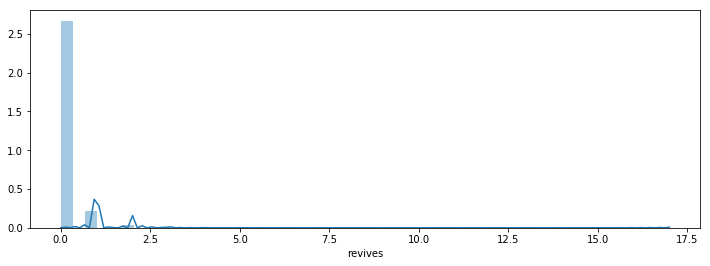

In [107]:
plt.figure(figsize=(12,4))
sns.distplot(data['revives'][data['matchType']=='Other'], bins=50)
plt.show()

In [108]:
data[(data['matchType']=='Other') & (data['revives']>15)]
# only one tuple. it's okay not to remove it.

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshot_rate,boostsAndheals
4106346,63837cd6a9d447,a9f951fb558c17,af73a298e95102,0,1,314.8,21,0,1,3,...,0.0,1,0,408.8,4,0,0.4091,408.8,0.0,2


In [110]:
data[(data['matchType']=='solo') & (data['revives']!=0)]
# legal.

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshot_rate,boostsAndheals


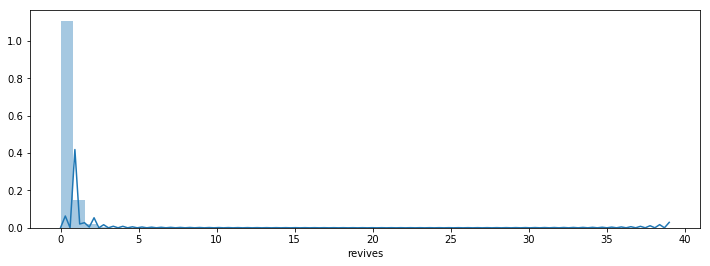

In [111]:
plt.figure(figsize=(12,4))
sns.distplot(data['revives'][data['matchType']=='duo'], bins=50)
plt.show()

In [114]:
data[(data['matchType']=='duo') & (data['revives']>25)]


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshot_rate,boostsAndheals
1552662,15f022687b14f3,75546296ef7f12,373314318f4a66,0,2,712.60,31,2,10,9,...,0.0,0,0,834.7,5,1590,0.7234,6457.7,0.666667,12
3088672,d83d7d4727b6a6,7e48f2e7544e4e,4b88648ebd67cb,0,7,81.62,13,0,22,38,...,0.0,0,0,1158.0,10,0,0.8085,1158.0,0.000000,29
4193891,11bf706b9dcb6a,dc5189d802fba2,289bff11ad634a,0,9,327.00,1,1,12,10,...,0.0,0,0,1299.0,11,1534,0.7872,1579.3,0.333333,21


In [115]:
data.drop(data[(data['matchType']=='duo') & (data['revives']>25)].index, inplace=True)
# reviving teammate for over 25 times seems too much for duo games

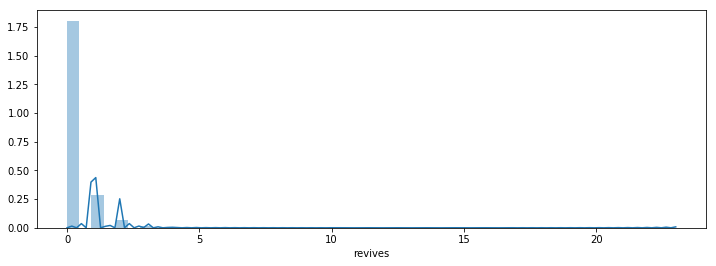

In [116]:
plt.figure(figsize=(12,4))
sns.distplot(data['revives'][data['matchType']=='squad'], bins=50)
plt.show()

In [119]:
data[(data['matchType']=='squad') & (data['revives']>20)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshot_rate,boostsAndheals
3219728,9ce1eb58797d60,f1f7c718a38abd,de9764529a7324,0,4,226.9,17,0,7,43,...,0.0,1,0,1217.0,6,1454,0.8462,4976.0,0.0,11


In [120]:
data.drop(data[(data['matchType']=='squad') & (data['revives']>20)].index, inplace=True)
# reviving teammate for over 20 times seems too much for squad games

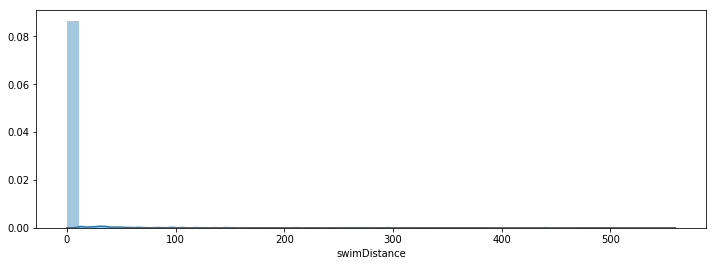

In [121]:
plt.figure(figsize=(12,4))
sns.distplot(data['swimDistance'][data['matchType']=='Other'], bins=50)
plt.show()
# 500m is acceptable for upper limit. no removal needed

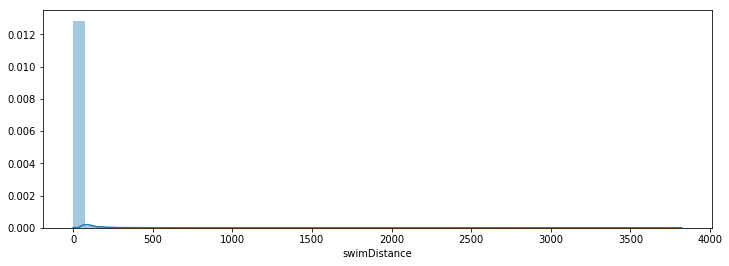

In [124]:
plt.figure(figsize=(12,4))
sns.distplot(data['swimDistance'][data['matchType']!='Other'], bins=50)
plt.show()

In [126]:
data[(data['matchType']!='Other') & (data['swimDistance']>2500)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshot_rate,boostsAndheals
1005337,d50c9d0e65fe2a,4996575c11abcb,668402592429f8,0,1,503.00,4,3,1,6,...,2718.0,0,0,4691.0,5,1516,1.0000,10740.0,1.0,2
1195818,f811de9de80b70,d08ddf7beb6252,8a48703ab52ec8,0,7,352.30,3,1,6,4,...,2668.0,0,0,415.1,10,1499,1.0000,3083.1,0.2,13
1227362,a33e917875c80e,5b72674b42712b,5fb0d8b1fc16cf,0,1,589.20,3,1,1,46,...,3823.0,0,0,995.3,9,0,1.0000,4818.3,0.5,2
2065940,312ccbb27b99aa,47c7f4d69e2fb1,b4b11756321f3a,1,3,49.59,0,0,5,48,...,3514.0,0,0,4296.0,8,1492,0.8511,9899.0,0.0,8


In [127]:
data.drop(data[(data['matchType']!='Other') & (data['swimDistance']>2500)].index, inplace=True)

    Our map is either 8*8 or 4*4 (km*km) size. The upper limit for the digonal distance is 8*sqrt(2)≈11.3
    My friends and I both reached 11km for maximum moving distance according to our records.
    In this respect, we consider total distance > 25km to be abnormal.

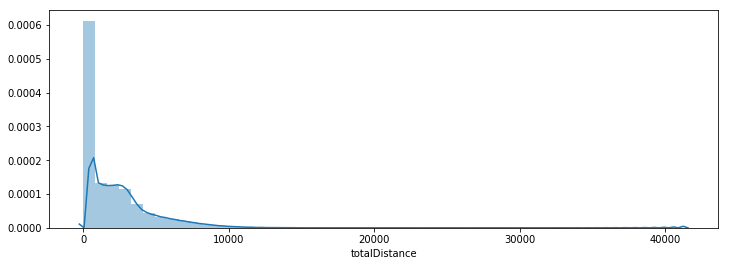

In [134]:
plt.figure(figsize=(12,4))
sns.distplot(data['totalDistance'], bins=50)
plt.show()

In [136]:


data[(data['totalDistance']>25000)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshot_rate,boostsAndheals
28588,6260f7c49dc16f,b24589f02eedd7,6ebea3b4f55b4a,0,0,99.200,0,0,1,30,...,0.000,0,0,376.60,6,0,0.6421,26306.6000,0.000000,1
70507,ca6fa339064d67,f7bb2e30c3461f,3bfd8d66edbeff,0,0,100.000,0,0,0,26,...,0.000,0,0,467.50,3,0,0.8878,28917.5000,0.000000,0
95276,c3fabfce7589ae,15529e25aa4a74,d055504340e5f4,0,7,778.200,0,1,2,2,...,0.000,0,0,923.20,6,0,0.9785,26733.2000,0.142857,9
297186,88904c200175b6,012a61a01e146e,7a270c25e9b70c,0,1,0.000,0,0,1,47,...,0.000,0,0,297.30,3,0,0.7447,29267.3000,0.000000,2
426708,149e224a2330ae,6d8cb80b3de8ff,f8b8e2643f60ee,0,2,0.000,0,0,2,43,...,0.000,0,0,402.10,3,1449,0.8171,32362.1000,0.000000,4
497965,3304d0c68e27f5,503757159d22dd,ce88f9c8c35bdf,0,0,0.000,0,0,0,46,...,381.900,0,0,25780.00,0,0,0.9894,26161.9078,0.000000,0
519956,da712b9fb33c1b,d973e1220e4c06,ebc50eb3ed1d2b,0,1,99.750,0,0,15,24,...,0.000,0,0,843.90,4,1542,0.8444,28803.9000,0.000000,16
605623,8dee54600c67ca,e77f3e175b5959,26bc606cdae6bf,0,0,11.210,0,0,0,27,...,0.000,0,0,1641.00,0,1498,0.6800,35611.0000,0.000000,0
606954,3dbe79a2795d6a,aeac79e58ddba3,ff6ee08e8b16be,0,3,100.000,0,1,9,20,...,0.000,0,0,1065.00,5,0,0.8925,29245.0000,1.000000,12
738724,d2bc0f555668c9,94176d50b3039d,77ae39dc29bfeb,0,0,0.000,0,0,2,48,...,0.000,0,0,219.70,2,0,0.6957,28589.7000,0.000000,2


In [137]:
# drop those who move way too much
data.drop(data[(data['totalDistance']>25000)].index, inplace=True)

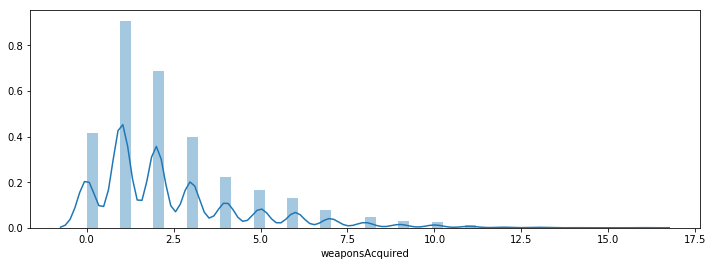

In [138]:
plt.figure(figsize=(12,4))
sns.distplot(data['weaponsAcquired'][data['matchType']=='Other'], bins=50)
plt.show()
# seems normal for 'other' matches.

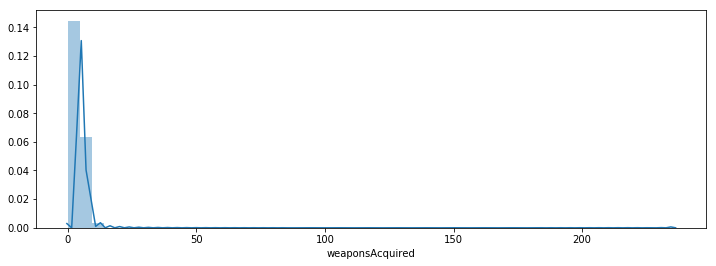

In [139]:
plt.figure(figsize=(12,4))
sns.distplot(data['weaponsAcquired'][data['matchType']!='Other'], bins=50)
plt.show()

In [145]:
data[data['weaponsAcquired']>60]
# delete those who acquired more than 60 weapons


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshot_rate,boostsAndheals
88852,b45b70a8d261e5,894d0860012ee1,17dea22cefe62a,8,0,1551.00,0,2,6,18,...,0.00,0,0,26.06,61,0,0.2857,26.06,0.142857,6
100009,6960550b7f37b2,65bcc1e5d4f168,17dea22cefe62a,7,0,2028.00,0,5,6,15,...,0.00,0,0,274.50,63,0,0.5714,274.50,0.277778,6
104825,4fe1c1b84d0e4c,62bc19a85c2ed8,17dea22cefe62a,3,0,2651.00,0,3,3,9,...,0.00,0,0,1024.00,71,0,0.9286,4645.00,0.125000,3
180523,aa4031a9ba3fbf,04f57c0cfb1306,5921b55b9e96b5,7,0,2869.00,0,2,5,5,...,0.00,0,0,1436.00,72,0,0.7333,3107.00,0.066667,5
185056,009d57d25f387f,d433eda5ca10d8,8842de7d656889,0,2,388.40,2,1,3,6,...,0.00,1,0,2482.00,67,0,0.9259,2482.00,0.333333,5
233643,7c8c83f5f97d0f,b33b210a52a2f8,2e8a0917a71c43,0,0,67.11,0,0,0,44,...,0.00,0,0,1307.00,128,1577,0.7111,3187.00,0.000000,0
333833,ddbfcefefb543f,39699b8f491543,cfa2775c9ef944,8,0,2361.00,0,6,13,13,...,0.00,0,0,1676.00,67,1500,0.6944,5348.00,0.260870,13
422018,79497b3ad02a5e,64ec3f1e594f01,fa085380974299,0,4,184.50,1,0,1,28,...,0.00,0,0,1720.00,70,0,0.9792,4266.00,0.000000,5
464124,2e36b7589a065a,667b7c652802e1,53a2310a35a149,1,1,48.83,0,0,1,49,...,0.00,0,0,1764.00,63,0,0.6304,8800.00,0.000000,2
588387,c58e3e0c2ba678,3d3e6100c07ff0,d04dbb98249f76,0,1,175.30,1,0,2,48,...,0.00,0,0,1687.00,80,0,0.7500,1687.00,0.000000,3


In [146]:
data.drop(data[(data['weaponsAcquired']>60)].index, inplace=True)

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4445115 entries, 0 to 4446965
Data columns (total 32 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
totalDistance      float64
headshot_rate      float64
boostsAndheals     int64
dtypes: float64(8), int64(20), object(4)
memory usage: 1.1+ GB


In [ ]:
data.to_csv("train_h.csv",sep=",",header=True)
data.to_csv("train_nh.csv",sep=",",header=False)